# EDA and Predictive Modeling : Analyzing Factors Influencing Campus Placement Salaries

## I. Introduction

Campus recruitment plays a crucial role in shaping the career trajectories of students as they transition from academics to professional life. Understanding the factors that influence the salary offered during campus placements can help educational institutions, students, and recruiters make informed decisions. This project, "Campus Recruitment EDA and Regression Prediction," aims to explore and analyze various educational and experiential factors to predict the salary offered to candidates during campus placements.

The dataset used in this project contains information on students' academic performance, work experience, and other relevant attributes, such as their specialization and employability test scores. By performing an Exploratory Data Analysis (EDA) and applying regression models, the project seeks to identify patterns and build a predictive model that can estimate the salary based on these factors.

For those interested in exploring the dataset, you can find it here: [Analyzing Factors Influencing Campus Placement Salarie](https://www.kaggle.com/benroshan/factors-affecting-campus-placement)

## II. Importing Libraries and Loading Dataset

In [27]:
# Importing the scikit-learn library for machine learning tools and techniques
import sklearn

# Importing numpy library for numerical operations and working with arrays
import numpy as np

# Importing pandas library for data manipulation and analysis
import pandas as pd

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sqrt function from the math module for calculating square roots
from math import sqrt

# Importing DecisionTreeRegressor from scikit-learn for decision tree regression
from sklearn.tree import DecisionTreeRegressor

# Importing LinearRegression from scikit-learn for linear regression
from sklearn.linear_model import LinearRegression

# Importing RandomForestRegressor from scikit-learn for random forest regression
from sklearn.ensemble import RandomForestRegressor

# Importing train_test_split from scikit-learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing StandardScaler from scikit-learn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Importing various metrics for model evaluation from scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score  # For classification evaluation (though not typically used in regression)
from sklearn.metrics import f1_score, r2_score  # F1 score for classification, R² score for regression
from sklearn.metrics import mean_absolute_error  # Mean Absolute Error for regression
from sklearn.metrics import mean_squared_error  # Mean Squared Error for regression

# Importing LabelEncoder from scikit-learn for encoding categorical variables as integers
from sklearn.preprocessing import LabelEncoder

# Importing cross_val_score and KFold from scikit-learn for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import joblib

## 1. Loading the dataset 

In [28]:
# Reading the dataset from a CSV file into a pandas DataFrame

data = pd.read_csv("Placement_Data_Full_Class_1.csv")

# Random sample of 10 rows 

data.sample(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_t,degree_p,workex,etest_p,specialisation,mba_p,status,salary
125,126,F,84.00,Central,73.00,Central,Commerce,Comm&Mgmt,73.00,No,75.0,Mkt&Fin,73.33,Placed,350000.0
203,204,M,55.68,Others,61.33,Others,Commerce,Comm&Mgmt,56.87,No,66.0,Mkt&HR,58.30,Placed,260000.0
107,108,M,82.00,Others,90.00,Others,Commerce,Comm&Mgmt,83.00,No,80.0,Mkt&HR,73.52,Placed,200000.0
120,121,M,58.00,Others,40.00,Others,Science,Comm&Mgmt,59.00,No,73.0,Mkt&HR,58.81,Not Placed,NaN
213,214,F,74.00,Others,66.00,Others,Commerce,Comm&Mgmt,58.00,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.00,Central,58.00,Others,Science,Comm&Mgmt,53.00,No,89.0,Mkt&HR,60.22,Not Placed,NaN
36,37,M,51.00,Central,44.00,Central,Commerce,Comm&Mgmt,57.00,No,64.0,Mkt&Fin,51.45,Not Placed,NaN
191,192,M,67.00,Others,61.00,Central,Science,Comm&Mgmt,72.00,No,72.0,Mkt&Fin,61.01,Placed,264000.0
108,109,M,61.00,Central,82.00,Central,Commerce,Comm&Mgmt,69.00,No,84.0,Mkt&Fin,58.31,Placed,300000.0
150,151,M,71.00,Central,58.66,Central,Science,Sci&Tech,58.00,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0


## 2. Inspecting the dataset 

In [29]:
# The names of all columns in the DataFrame
print("The columns in the dataset are:")
for i,col in enumerate(data.columns):
    print(f"Column {i} : {col}")

The columns in the dataset are:
Column 0 : sl_no
Column 1 : gender
Column 2 : ssc_p
Column 3 : ssc_b
Column 4 : hsc_p
Column 5 : hsc_b
Column 6 : hsc_s
Column 7 : degree_t
Column 8 : degree_p
Column 9 : workex
Column 10 : etest_p
Column 11 : specialisation
Column 12 : mba_p
Column 13 : status
Column 14 : salary


***Dataset Feature Definitions :***

+ **sl_no:** Serial number to identify each candidate.
+ **gender:** Gender of the candidate (M for Male, F for Female).
+ **ssc_p:** Secondary Education percentage (10th Grade).
+ **ssc_b:** Board of Education for Secondary School (Central/Other).
+ **hsc_p:** Higher Secondary Education percentage (12th Grade).
+ **hsc_b:** Board of Education for Higher Secondary School (Central/Other).
+ **hsc_s:** Specialization in Higher Secondary Education.
+ **degree_p:** Degree percentage.
+ **degree_t:** Type of degree obtained (field of study).
+ **workex:** Work experience (Yes/No).
+ **etest_p:** Employability test percentage (conducted by the college).
+ **specialisation:** Specialization in MBA (Master of Business Administration).
+ **mba_p:** MBA percentage.
+ **status:** Placement status of the candidate (Placed/Not placed).
+ **salary:** Salary offered by the company to the candidate.

In [30]:
# Summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_t        215 non-null    object 
 8   degree_p        215 non-null    float64
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


+ The DataFrame consists of 215 entries with 15 columns.
+ The columns include a mix of data types:
    + 6 columns are float64.
    + 1 column is int64.
    + 8 columns are object.
+ Most columns have 215 non-null entries, indicating that they are fully populated.
+ The salary column contains missing values (NaNs). We'll fill these NaN values with 0, this can logically represent candidates who were not placed and therefore did not receive a salary. 
+ The **sl_no** column is a serial number used to uniquely identify each row. It does not contain any meaningful information that contributes to the predictive modeling.

In [31]:
# Dropping the 'sl_no' column as it is just a serial number

data = data.drop('sl_no', axis=1)

# Filling missing values in the 'salary' column with 0

data['salary'] = data['salary'].fillna(0)

## II. Exploratory Data Analysis (EDA)

### 1. Categorical Columns

In [32]:
# Summary statistics for categorical (object) columns 
data.describe(include='object')

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


+ Each column has 215 entries, with no missing values.
+ Most frequent categories:
    + Gender: Majority are Male (M).
    + Secondary and Higher Secondary Boards: Most students are from the Central (ssc_b) and Others (hsc_b) boards.
    + Specializations: Commerce (hsc_s) and Commerce & Management (degree_t) are the most common specializations.
    + Work Experience: Most students do not have work experience.
    + MBA Specialization: Marketing & Finance (Mkt&Fin) is the most chosen.
    + Placement Status: The majority of students were placed.

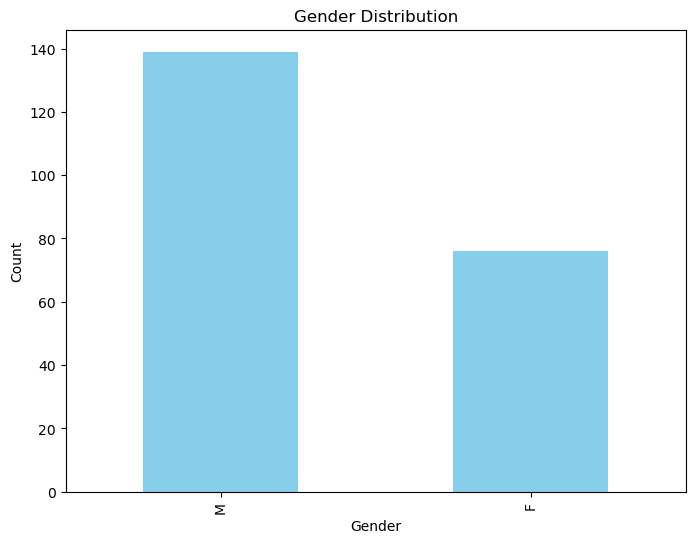

In [33]:
# Plot for 'gender'
plt.figure(figsize=(8, 6))
data['gender'].value_counts().plot(kind='bar', color='skyblue', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that there are more male (M) candidates than female (F) candidates in the dataset.

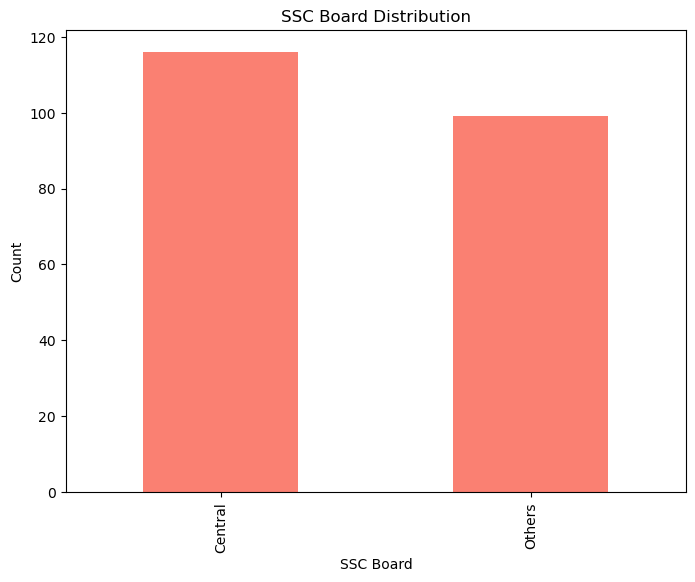

In [34]:
# Plot for 'ssc_b'
plt.figure(figsize=(8, 6))
data['ssc_b'].value_counts().plot(kind='bar', color='salmon', title='SSC Board Distribution')
plt.xlabel('SSC Board')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that more students come from the Central board compared to other boards in the dataset, though the difference is not very large.

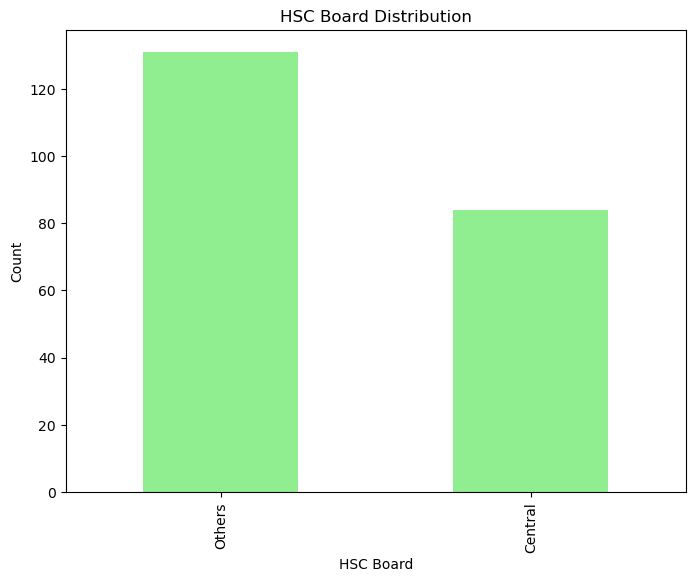

In [35]:
# Plot for 'hsc_b'
plt.figure(figsize=(8, 6))
data['hsc_b'].value_counts().plot(kind='bar', color='lightgreen', title='HSC Board Distribution')
plt.xlabel('HSC Board')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that most students in the dataset come from the "Others" board for Higher Secondary education, with fewer students from the Central board.

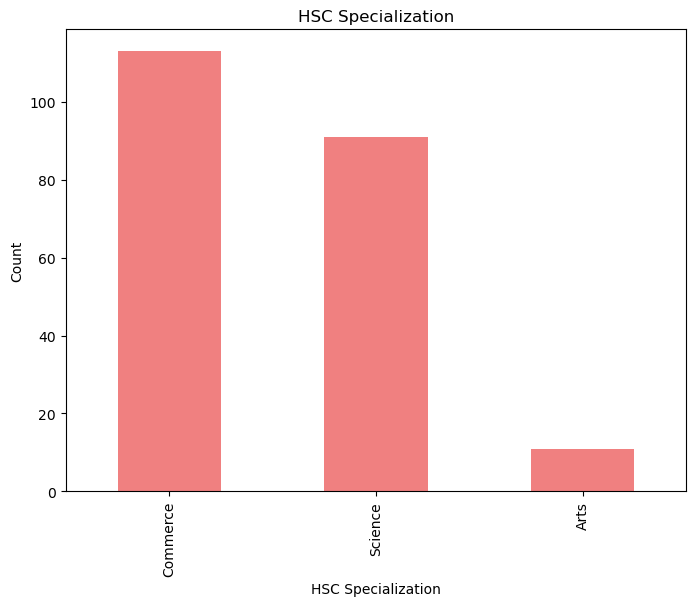

In [36]:
# Plot for 'hsc_s'
plt.figure(figsize=(8, 6))
data['hsc_s'].value_counts().plot(kind='bar', color='lightcoral', title='HSC Specialization')
plt.xlabel('HSC Specialization')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that the majority of students in the dataset specialized in Commerce during their Higher Secondary education, followed by Science, with a small number of students specializing in Arts.

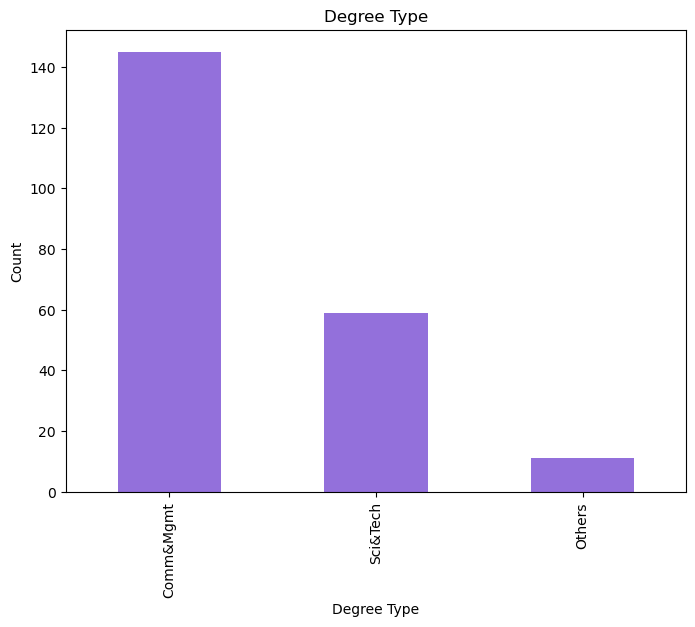

In [37]:
# Plot for 'degree_t'
plt.figure(figsize=(8, 6))
data['degree_t'].value_counts().plot(kind='bar', color='mediumpurple', title='Degree Type')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that the majority of students in the dataset obtained degrees in Commerce & Management, followed by Science & Technology, with very few students having degrees in other fields.

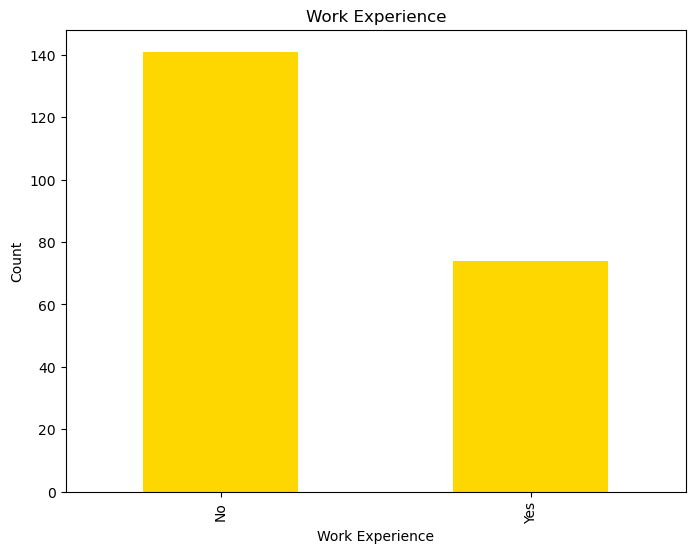

In [38]:
# Plot for 'workex'
plt.figure(figsize=(8, 6))
data['workex'].value_counts().plot(kind='bar', color='gold', title='Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that the majority of students in the dataset do not have work experience, while a smaller portion has some work experience.

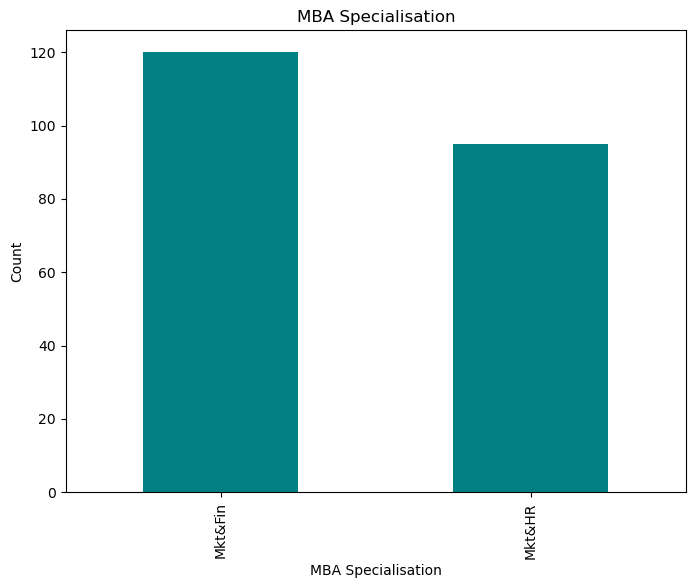

In [39]:
# Plot for 'specialisation'
plt.figure(figsize=(8, 6))
data['specialisation'].value_counts().plot(kind='bar', color='teal', title='MBA Specialisation')
plt.xlabel('MBA Specialisation')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that more students in the dataset specialized in Marketing & Finance (Mkt&Fin) compared to Marketing & Human Resources (Mkt&HR) during their MBA studies.

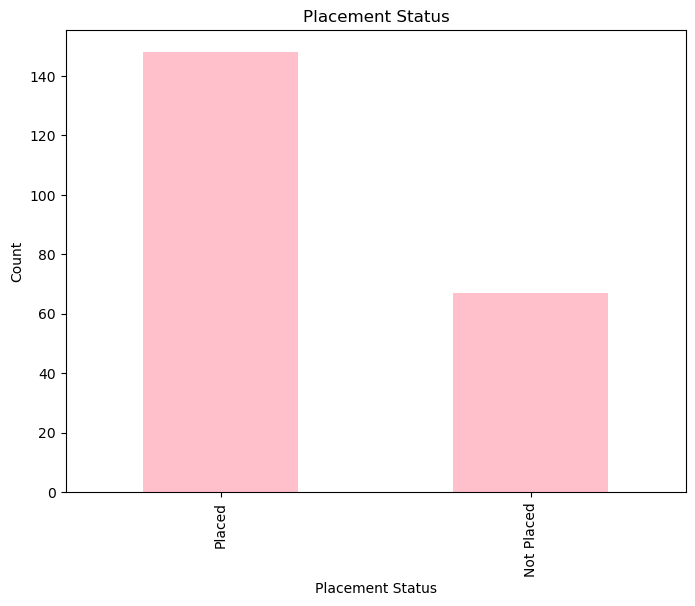

In [40]:
# Plot for 'status'
plt.figure(figsize=(8, 6))
data['status'].value_counts().plot(kind='bar', color='pink', title='Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()

+ The bar chart shows that a majority of students in the dataset were placed in jobs, while a smaller portion was not placed.

### 2. Numerical Columns

In [41]:
# Summary statistics for the numerical column
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


+ The salary distribution is highly skewed, with the minimum at 0  and a maximum of 940,000.
+ 25% of students received no salary.
+ The average salary offered is approximately 198,702.
+ The minimum scores are in the 37% to 51% range.

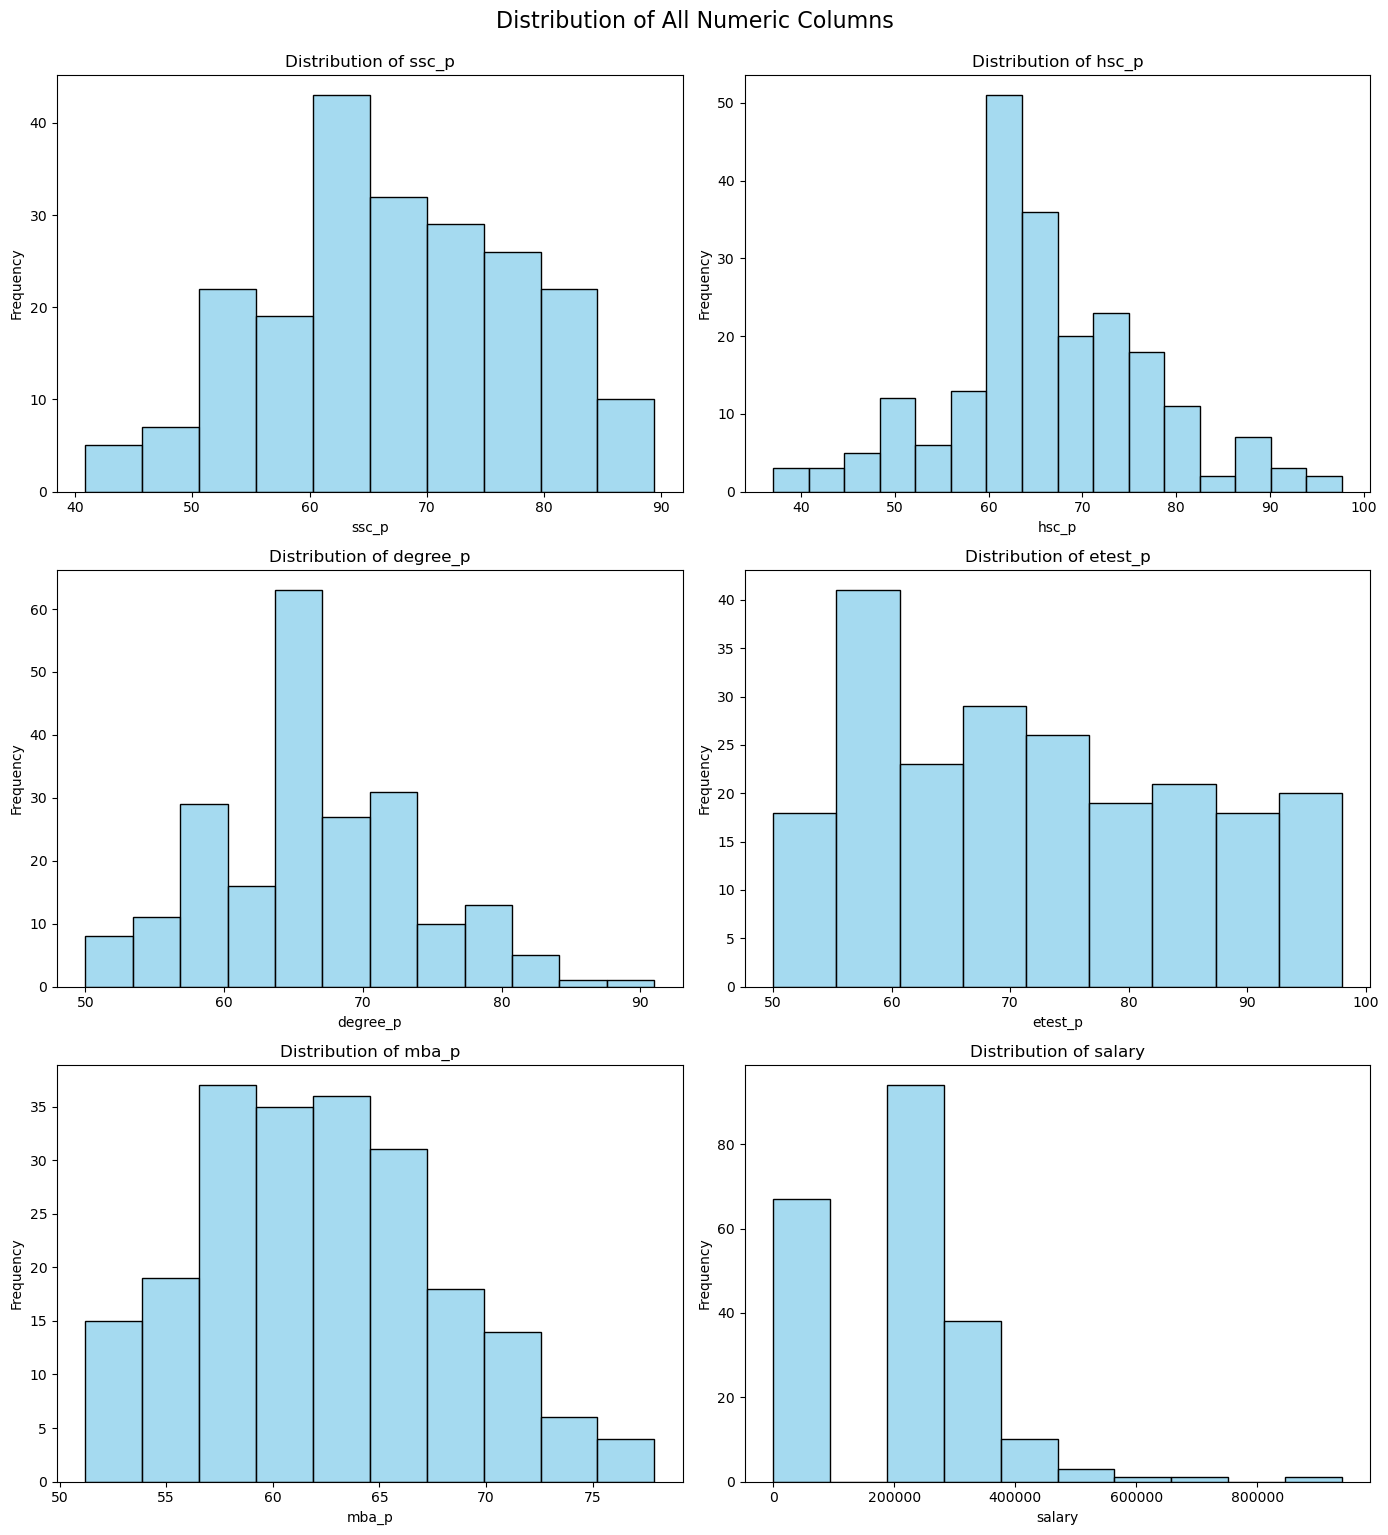

In [42]:
# Get all numeric columns 
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed
num_plots = len(numeric_columns)
num_cols = 2  # Set the number of columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed

# Set the figure size and layout
plt.figure(figsize=(14, num_rows * 5))  # Adjust height dynamically based on the number of rows

# Loop through each numeric column and create a subplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create a subplot grid
    sns.histplot(data[column], kde=False, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Set a common title for all subplots
plt.suptitle('Distribution of All Numeric Columns', fontsize=16, y=1.02)

# Display the plot
plt.show()

+ The salary distribution is highly right-skewed, with a large number of students earning low or no salary (around 0), and fewer students earning significantly higher salaries.
+ Most distributions are centered around the 60-70% range, indicating that the majority of students achieved average to above-average scores.
+ There are slight right-skews in some distributions (etest_p and mba_p), suggesting a few students performed exceptionally well.

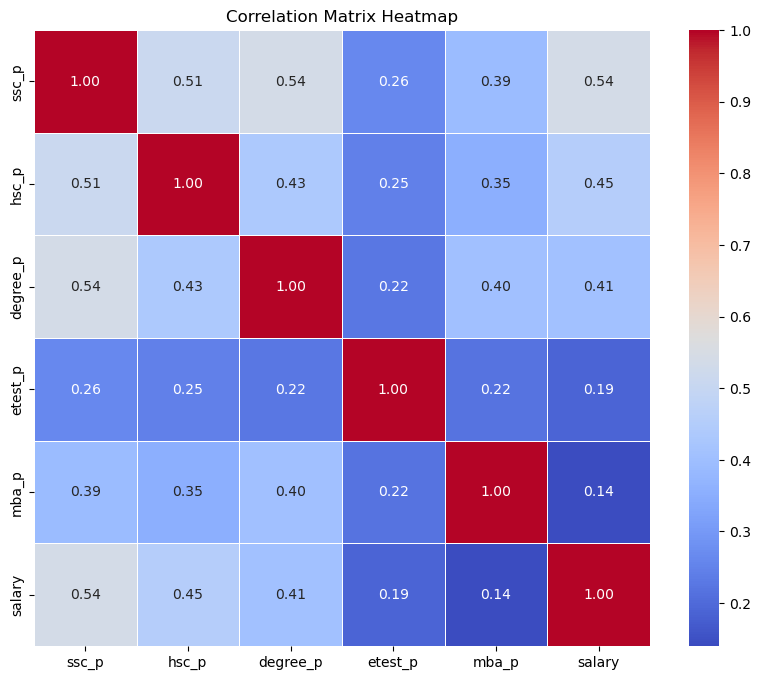

In [43]:
#Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

+ The salary variable has low correlations with all other features, with the highest being 0.18 with both etest_p (Employability test percentage) and mba_p (MBA percentage). This suggests that these features may have a slight influence on the salary but not a strong one.
+ ssc_p (Secondary Education percentage) and degree_p (Degree percentage) have a moderate positive correlation of 0.54, suggesting that students with higher secondary education scores tend to perform better in their degree as well.
+ ssc_p and hsc_p (Higher Secondary Education percentage) also show a moderate correlation of 0.51.

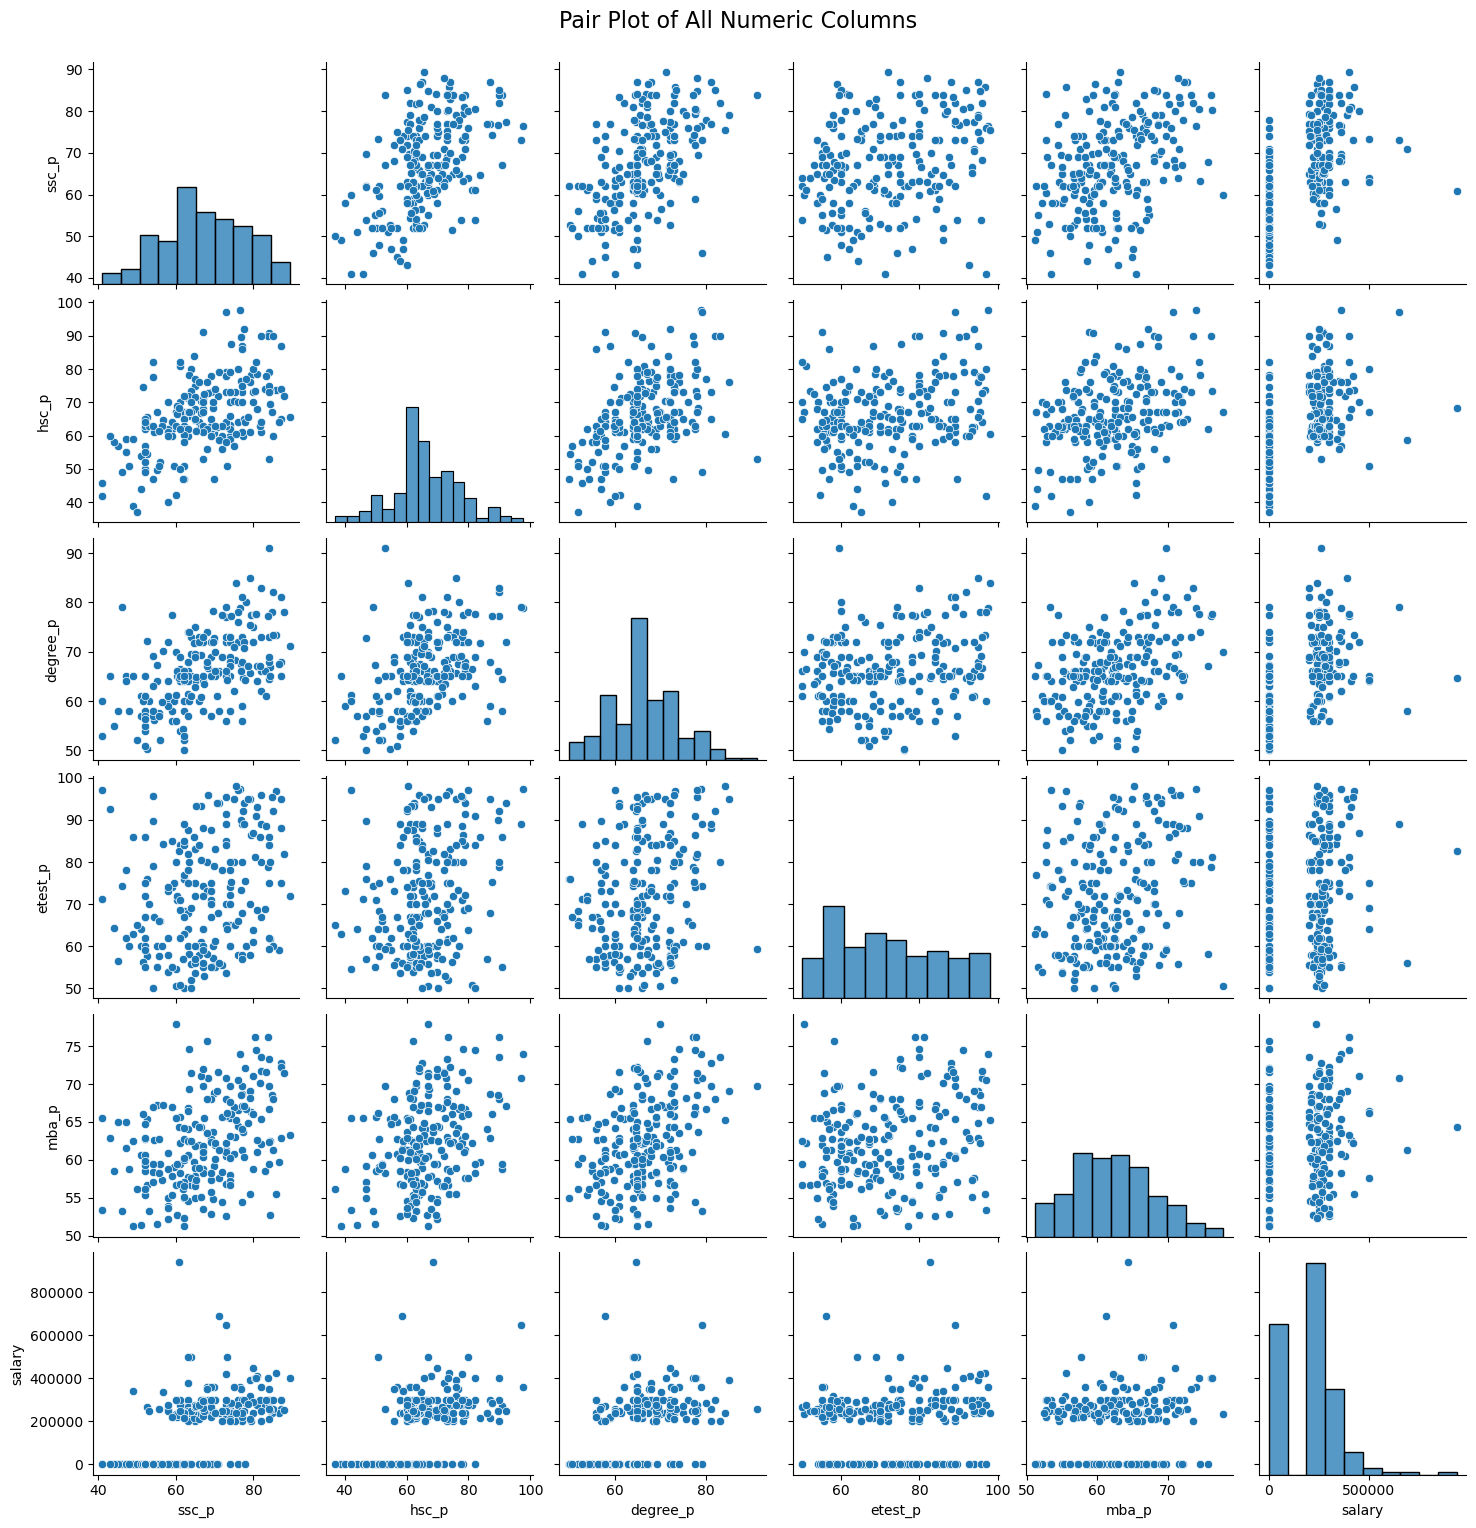

In [44]:
# Create a pair plot for all numeric columns in the DataFrame
sns.pairplot(data)

# Set a title for the entire plot
plt.suptitle('Pair Plot of All Numeric Columns', fontsize=16, y=1.02)

# Display the plot
plt.show()

## IV. Predictive Modeling

### 1. Data Preprocessing

In [45]:
# List of categorical columns that need to be encoded

cols = ['gender', 'ssc_b', 'hsc_b','hsc_s', 'degree_t','workex','specialisation', 'status']

# Initialize the LabelEncoder, which will convert categorical values to numerical values

encoder = LabelEncoder()

# Apply the LabelEncoder to each of the specified columns in the DataFrame

data[cols] = data[cols].apply(encoder.fit_transform)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_t,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,2,58.00,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,2,77.48,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,0,64.00,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,2,52.00,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,0,73.30,0,96.8,0,55.50,1,425000.0


In [46]:
# Independent features

X = data.drop(columns=['salary']).values  

# The dependent variable 

Y = data['salary'].values  

In [47]:
# train/test/split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 100)

In [48]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test = scaler.transform(X_test)

### 2. Regression Models

#### a. Linear Regressor

In [49]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_test)
r2_lm = r2_score(Y_test, Y_pred)
rms_lm = sqrt(mean_squared_error(Y_test, Y_pred))
mae_lm = mean_absolute_error(Y_test, Y_pred)
print(f"MAE : is {mae_lm}")
print(f"RMSE : {rms_lm}")
print(f"R² score : {r2_lm}")

MAE : is 41062.68242618377
RMSE : 57060.14364376703
R² score : 0.8560146942003246


In [50]:
# Initialize the Linear Regression model

lm = LinearRegression()

# Fit the model to the training data

lm.fit(X_train, Y_train)

# Predict the target variable (salary) for the test data

Y_pred = lm.predict(X_test)

# Calculate the Mean Absolute Error (MAE)

mae_lm = mean_absolute_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error (RMSE)

rms_lm = sqrt(mean_squared_error(Y_test, Y_pred))

# Calculate the R² score

r2_lm = r2_score(Y_test, Y_pred)

print("Linear model performance metrics")
print(f"MAE : {mae_lm}")
print(f"RMSE : {rms_lm}")
print(f"R² score : {r2_lm}")

Linear model performance metrics
MAE : 41062.68242618377
RMSE : 57060.14364376703
R² score : 0.8560146942003246


#### b. Decision Tree Regressor

In [51]:
# Initialize the Decision Tree Regressor model

dtree = DecisionTreeRegressor()

# Fit the model to the training data

dtree.fit(X_train, Y_train)

# Predict the target variable (salary) for the test data

Y_pred = dtree.predict(X_test)

# Calculate the Mean Absolute Error (MAE), another measure of prediction error

mae_dtree = mean_absolute_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error (RMSE), a measure of the model's prediction error

rms_dtree = sqrt(mean_squared_error(Y_test, Y_pred))


# Calculate the R² score, which indicates how well the model explains the variance in the data

r2_dtree = r2_score(Y_test, Y_pred)

print("Decision Tree model performance metrics")
print(f"MAE : {mae_dtree}")
print(f"RMSE : {rms_dtree}")
print(f"R² score : {r2_dtree}")

Decision Tree model performance metrics
MAE : 23727.272727272728
RMSE : 45927.8089654148
R² score : 0.9067166988413461


#### c. Random Forest Regressor 

In [52]:
# Initialize the Random Forest Regressor model

rf = RandomForestRegressor()

# Fit the model to the training data

rf.fit(X_train, Y_train)

# Predict the target variable (salary) for the test data

Y_pred = rf.predict(X_test)

# Calculate the Mean Absolute Error (MAE), a measure of prediction error

mae_rf = mean_absolute_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error (RMSE), a measure of the model's prediction error

rms_rf = sqrt(mean_squared_error(Y_test, Y_pred))

# Calculate the R² score, which indicates how well the model explains the variance in the data

r2_rf = r2_score(Y_test, Y_pred)

# Print the performance metrics with a header message
print("Random Forest model performance metrics")
print(f"MAE : {mae_rf}")
print(f"RMSE : {rms_rf}")
print(f"R² score : {r2_rf}")

Random Forest model performance metrics
MAE : 23556.363636363636
RMSE : 40001.1754372748
R² score : 0.9292383488066618


#### d. Summary

In [53]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','Decision Tree Regressor', 
             'Random Forest Regressor'],
    'MAE' : [mae_lm, mae_dtree, mae_rf],
    'RMSE' : [rms_lm, rms_dtree, rms_rf],
    'R² Score': [ r2_lm, r2_dtree, r2_rf]
})

models

,Algorithm,MAE,RMSE,R² Score
0,Linear Regression,41062.682426,57060.143644,0.856015
1,Decision Tree Regressor,23727.272727,45927.808965,0.906717
2,Random Forest Regressor,23556.363636,40001.175437,0.929238


+ Random Forest Regressor is the best model among the three, as it has the highest R² score (0.935) and the lowest errors (MAE and RMSE). This indicates that it provides the most accurate predictions and explains the data variance better than the other models.

### 3. Cross-Validation

#### a. Linear Regression Model

In [54]:
# Prepare the cross-validation procedure with 10 splits
cv = KFold(n_splits=10, random_state=100, shuffle=True)

# Create and fit the Linear Regression model to the training data
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Evaluate the model using cross-validation with R² scoring
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=cv)

# Print the cross-validation scores
print(f'Cross-Validation R² Scores for each fold: {scores}')
print(f'\nMean R² Score from cross-validation: {scores.mean():.4f}')
print(f'Standard Deviation of R² Scores: {scores.std():.4f}\n')

# Predict the target values for the test set
Y_pred = lm.predict(X_test)

# Calculate the R² score for the test set
r2_lm = sklearn.metrics.r2_score(Y_test, Y_pred)

# Print the R² score for the test set
print(f'R² Score on the Test Set: {r2_lm:.4f}')

Cross-Validation R² Scores for each fold: [0.38827382 0.92096559 0.91129048 0.45366235 0.80962964 0.58375412
 0.88058478 0.90016116 0.88374671 0.53534407]

Mean R² Score from cross-validation: 0.7267
Standard Deviation of R² Scores: 0.2008

R² Score on the Test Set: 0.8560


#### b. Decision Tree Regressor Model

In [55]:
# Prepare the cross-validation procedure with 10 splits
cv = KFold(n_splits=10, random_state=100, shuffle=True)

# Create and fit the Decision Tree Regressor model to the training data
dtree = DecisionTreeRegressor()
dtree.fit(X_train, Y_train)

# Evaluate the model using cross-validation with R² scoring
scores = cross_val_score(dtree, X_train, Y_train, scoring='r2', cv=cv)

# Print the cross-validation scores with better formatting
print("Cross-Validation R² Scores for each fold:")
print(scores)
print(f'\nMean R² Score from cross-validation: {scores.mean():.4f}')
print(f'Standard Deviation of R² Scores: {scores.std():.4f}\n')

# Predict the target values for the test set
Y_pred = dtree.predict(X_test)

# Calculate the R² score for the test set
r2_dtree = sklearn.metrics.r2_score(Y_test, Y_pred)

# Print the R² score for the test set
print(f'R² Score on the Test Set: {r2_dtree:.4f}')


Cross-Validation R² Scores for each fold:
[0.21621575 0.27643017 0.79929682 0.52018377 0.75835388 0.5567776
 0.77971826 0.69538414 0.66604547 0.17630495]

Mean R² Score from cross-validation: 0.5445
Standard Deviation of R² Scores: 0.2279

R² Score on the Test Set: 0.8850


#### c. Random Forest Model

In [56]:
# Prepare the cross-validation procedure with 10 splits
cv = KFold(n_splits=10, random_state=100, shuffle=True)

# Create and fit the Random Forest Regressor model to the training data
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

# Evaluate the model using cross-validation with R² scoring
scores = cross_val_score(rf, X_train, Y_train, scoring='r2', cv=cv)

# Print the cross-validation scores with better formatting
print("Cross-Validation R² Scores for each fold:")
print(scores)
print(f'\nMean R² Score from cross-validation: {scores.mean():.4f}')
print(f'Standard Deviation of R² Scores: {scores.std():.4f}\n')

# Predict the target values for the test set
Y_pred = rf.predict(X_test)

# Calculate the R² score for the test set
r2_rf = sklearn.metrics.r2_score(Y_test, Y_pred)

# Print the R² score for the test set
print(f'R² Score on the Test Set: {r2_rf:.4f}')

Cross-Validation R² Scores for each fold:
[0.36604261 0.88466114 0.85647785 0.43182393 0.81958559 0.52139801
 0.86073099 0.89964668 0.88019445 0.46318713]

Mean R² Score from cross-validation: 0.6984
Standard Deviation of R² Scores: 0.2103

R² Score on the Test Set: 0.9423


### 4. Summary

In [57]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression','Decision Tree Regressor', 
             'Random Forest Regressor'],
    'R² Score': [ r2_lm, r2_dtree, r2_rf],
    })

models.sort_values(by = ['R² Score'], ascending = False)

,Algorithm,R² Score
2,Random Forest Regressor,0.942340
1,Decision Tree Regressor,0.884981
0,Linear Regression,0.856015


***NOTE :*** The Random Forest Regressor is the best choice. It has the highest R² score on the test set (0.9423) and the lowest prediction errors (MAE: 22,184.55, RMSE: 38,300.27), indicating strong predictive power and accuracy. Despite some variability in cross-validation, its overall performance makes it the most reliable model among the three.

## V. Make Predictions

In [58]:
# Example new data for predictions
new_data = pd.DataFrame({
    'gender': [1],
    'ssc_p': [90.50],
    'ssc_b': [1],
    'hsc_p': [88.00],
    'hsc_b': [1],
    'hsc_s': [2],
    'degree_p': [88.00],
    'degree_t': [0],
    'workex': [1],
    'etest_p': [75.00],
    'specialisation': [1],
    'mba_p': [77.00],
    'status': [1]
})
# Save the model
joblib.dump(rf, 'random_forest_model.pkl')

# Load the model
rf_loaded = joblib.load('random_forest_model.pkl')

# Scale the new data (assuming scaler was also previously fitted and saved)
new_data_scaled = scaler.transform(new_data.values)

# Make predictions using the loaded model
new_predictions = rf_loaded.predict(new_data_scaled)

# Display the predictions
print(f"Predicted Salary for New Data: {new_predictions[0]}")

Predicted Salary for New Data: 384700.0


## VI. Conclusion

This project demonstrates the practical application of machine learning techniques to solve a real-world problem: predicting campus placement salaries. The Random Forest model provided strong predictions, but there is always room for further refinement, such as through hyperparameter tuning, more advanced feature engineering, or experimenting with other models like Gradient Boosting or Neural Networks.

The insights gained from this project could be valuable for educational institutions looking to understand the factors that influence placement outcomes and for students seeking to maximize their employability and earning potential.